In [1]:
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
import pandas as pd 
contamination = 0.1
n_train = 20000
n_test = 2000
n_features = 300

X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test, n_features=n_features, contamination=contamination, random_state=42)

2023-05-02 16:05:20.684884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
clf_name = 'AutoEncoder'
clf = AutoEncoder(hidden_neurons=[300,100,100,300], epochs=10, contamination=contamination)
clf.fit(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               90300     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               3

2023-05-02 16:05:23.212479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


563/563 [==============================] - 3s 4ms/step - loss: 3.6334 - val_loss: 1.4833
Epoch 2/10
563/563 [==============================] - 2s 3ms/step - loss: 1.2821 - val_loss: 1.1121
Epoch 3/10
563/563 [==============================] - 2s 3ms/step - loss: 1.1213 - val_loss: 1.0427
Epoch 4/10
563/563 [==============================] - 2s 3ms/step - loss: 1.0823 - val_loss: 1.0150
Epoch 5/10
563/563 [==============================] - 2s 3ms/step - loss: 1.0643 - val_loss: 0.9963
Epoch 6/10
563/563 [==============================] - 2s 3ms/step - loss: 1.0531 - val_loss: 0.9873
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 1.0452 - val_loss: 0.9802
Epoch 8/10
563/563 [==============================] - 2s 3ms/step - loss: 1.0391 - val_loss: 0.9739
Epoch 9/10
563/563 [==============================] - 2s 3ms/step - loss: 1.0344 - val_loss: 0.9685
Epoch 10/10
625/625 [==============================] - 1s 1ms/step


AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=10,
      hidden_activation='relu', hidden_neurons=[300, 100, 100, 300],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fdac9a86c10>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [3]:
y_train_pred = clf.labels_
y_train_score = clf.decision_scores_

y_test_pred = clf.predict(X_test)
y_test_score = clf.decision_scores_

63/63 [==============================] - 0s 1ms/step


In [4]:
pd.Series(y_test_pred).value_counts()

0    1800
1     200
dtype: int64

/var/folders/37/brl3s2hn2rdfswx8sdr8xp000000gn/T/ipykernel_93772/392837055.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mod_z)


<AxesSubplot: ylabel='Density'>

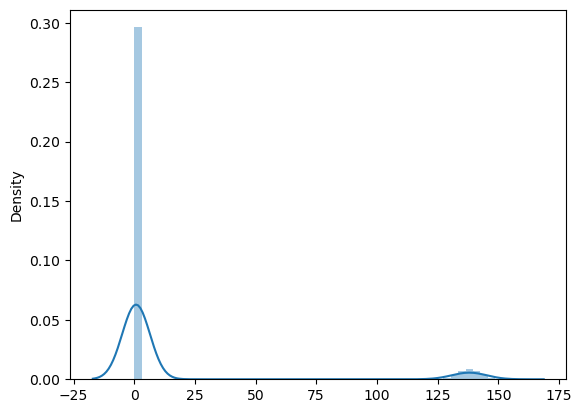

In [5]:
import seaborn as sns
import numpy as np

def mod_z(col):
    med_col = col.median()
    med_abs_dev = (np.abs(col-med_col)).median()
    mod_z = 0.7413*((col-med_col)/med_abs_dev)
    return np.abs(mod_z)

pd_s = pd.Series(y_test_score)
mod_z = mod_z(pd_s)
sns.distplot(mod_z)

In [6]:
print("Training Data : ")
evaluate_print(clf_name, y_train, y_train_score)
print("Testing Data : ")
evaluate_print(clf_name, y_test, y_test_score)

Training Data : 
AutoEncoder ROC:1.0, precision @ rank n:1.0
Testing Data : 


ValueError: Found input variables with inconsistent numbers of samples: [2000, 20000]